In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data/melb_data.csv')
df.dropna(inplace=True)
print(df.shape)
df.head()

(6196, 21)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0


In [3]:
df = df[(np.percentile(df['BuildingArea'], 25) < df['BuildingArea'])
        & (np.percentile(df['BuildingArea'], 75) > df['BuildingArea'])
        & (np.percentile(df['Price'], 25) < df['Price'])
        & (np.percentile(df['Price'], 75) > df['Price'])
       ]

In [4]:
df = df[df['Postcode'] == 3165]
ratio = df['BuildingArea']/df['Price']
df = df[(np.percentile(ratio, 25) < ratio) & (np.percentile(ratio, 75) > ratio)]

df['Price'] /= 100000

In [10]:
X = np.array(df['BuildingArea']).reshape(-1, 1)
y = np.array(df['Price'])

lr = LinearRegression()
lr.fit(X, y)

xx = np.arange(100, 170)
y_hat = lr.predict(xx.reshape(-1, 1))

Text(0.5, 0, 'Building Area ($m^2$)')

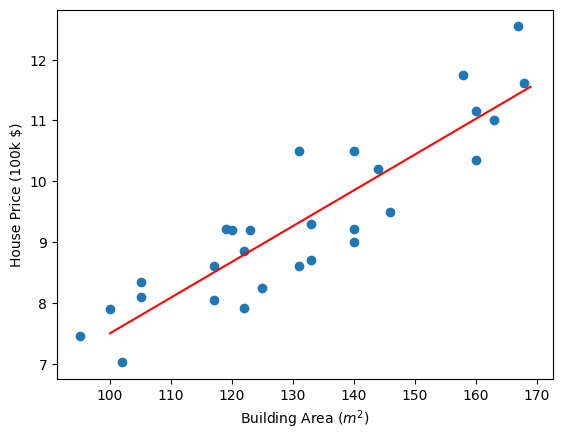

In [12]:
plt.scatter(df['BuildingArea'], df['Price'])
plt.plot(xx, y_hat, c='r')

plt.ylabel('House Price (100k $)')
plt.xlabel('Building Area ($m^2$)')